# scraping
- 웹 스크랩핑 : 웹사이트 상에서 위치를 지정해서 원하는 데이터를 추출하는 방법(정적파일_
- 웹 크롤링 : 자동화 봇을 이용하여 링크를 따라서 연결된 페이지를 가져와서 원하는 데이터를 추출하는 방법(동적파일)

- BeautifulSoup & Selenium

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [17]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError
import requests
import re

## 1. BeautifulSoup 시작하기

In [7]:
webpage = requests.get('https://www.daangn.com/hot_articles')
# webpage.text -> 문자열이라 parshing 불가능
# webpage.content -> 문자열이라 parshing 불가능
soup = BeautifulSoup(webpage.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

## 2. 태그 탐색하기
- 각 태그마다 자기를 기준으로 parent와 children 존재

In [9]:
print('<p> : ',soup.p)
print('string : ',soup.p.string)

<p> :  <p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>
string :  당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!


In [10]:
print('<h1> : ', soup.h1)

<h1> :  <h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>


In [12]:
for child in soup.h1.children:
    print(child)



<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a>
 


In [13]:
print('<ul>: ',soup.ul)

<ul>:  <ul class="fixed-menu-ul">
<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>
<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google Play" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/google-play-c9ad0fc573cd01e2b982df5de6709a3d8d7cec8d9b58a5c08db7da0b92a32a75.svg"/>
<span>Google Play</span>
</a> </li>
</ul>


In [14]:
for child in soup.ul.children:
    print(child)



<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>


<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google Play" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/google-play-c9ad0fc573cd01e2b982df5de6709a3d8d7cec8d9b58a5c08db7da0b92a32a75.svg"/>
<span>Google Play</span>
</a> </li>




In [15]:
for parent in soup.ul.parents:
    print(parent)

<div class="fixed-download-wrapper">
<input class="fixed-checkbox" id="fixed-menu-checkbox" type="checkbox"/>
<label class="fixed-label" for="fixed-menu-checkbox">
          다운로드
          <svg class="menu-icon-svg" fill="none" height="7" viewbox="0 0 12 7" width="12" xmlns="http://www.w3.org/2000/svg">
<path d="M1 1L6 6L11 1" stroke="#4D5159" strokelinecap="round" strokelinejoin="round" strokewidth="1.5"></path>
</svg>
</label>
<ul class="fixed-menu-ul">
<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>
<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google 

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

#### find_all() : 원하는 부분을 모두 가져올 때 사용하는 함수

In [16]:
print('find all 함수')
print()
print(soup.find_all('h2'))


find all 함수

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, <h2 class="card-title">자전거 두

### 정규표현식을 활용할 수 있다.

In [18]:
# ol ul 포함하는 값을 읽어오고 싶다면?

print(soup.find_all(re.compile('[ou]l')))

[<ul class="fixed-menu-ul">
<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>
<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google Play" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/google-play-c9ad0fc573cd01e2b982df5de6709a3d8d7cec8d9b58a5c08db7da0b92a32a75.svg"/>
<span>Google Play</span>
</a> </li>
</ul>, <ul class="footer-list">
<li class="footer-list-item"><a class="link-highlight" href="/trust">믿을 수 있는 중고거래</a></li>
<li class="footer-list-item"><a class="link-highlight" href="https://cs.kr.karrotmarket.com/wv/faqs">자주 묻는 질문</a></l

In [19]:
print(soup.find_all(re.compile('h[1-9]')))

[<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>, <h1 class="head-title" id="hot-articles-head-title">
    
    
    중고거래 인기매물
  </h1>, <h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정

In [23]:
print(soup.find_all(['h1','p']))

[<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>, <h1 class="head-title" id="hot-articles-head-title">
    
    
    중고거래 인기매물
  </h1>, <p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>]


## 속성을 활용하는 방법

In [24]:
print(soup.find_all(attrs={'class' : 'card-title'}))

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, <h2 class="card-title">자전거 두대 팔아용 각 7만원입니

## 3. css 선택자를 이용하는 방법(select)
- id : #
- class : .

In [25]:
print('type:',type(soup.select('.card-title')))
print()
print(soup.select('.card-title'))

type: <class 'bs4.element.ResultSet'>

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, <h

In [26]:
# get_text()
for title in soup.select('.card-title'):
    print(title.string,'-',title.get_text())

그래픽카드 PT-GTX1060 - 그래픽카드 PT-GTX1060
스팸선물세트 명절 추석 스팸3호 - 스팸선물세트 명절 추석 스팸3호
전자레인지 싸게 가져가세요~ - 전자레인지 싸게 가져가세요~
전자레인지 수납장 - 전자레인지 수납장
캠핑용품 강염버너 그리들버너 코베아 캠프1 - 캠핑용품 강염버너 그리들버너 코베아 캠프1
콤프레샤 - 콤프레샤
전기자전거  판매합니다.. - 전기자전거  판매합니다..
캠핑 우드선반 방출합니다~ - 캠핑 우드선반 방출합니다~
스팸클래식 340g / 200g - 스팸클래식 340g / 200g
노스피크퍼시픽오션소이 - 노스피크퍼시픽오션소이
밤고구마 10kg 박스판매 합니다. - 밤고구마 10kg 박스판매 합니다.
넘버앤 릴렉스 체어 / 캠핑 의자 - 넘버앤 릴렉스 체어 / 캠핑 의자
엘파마 MTB 자전거 코비 MT-5000 - 엘파마 MTB 자전거 코비 MT-5000
[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트 - [이사정리] 캠핑 의자 + 테이블 + 수납가방 세트
컴퓨터 - 컴퓨터
LG냉장고 - LG냉장고
전자렌지 커피포트 전기밥솥 판매합니다 - 전자렌지 커피포트 전기밥솥 판매합니다
갤럭시 버즈 플러스  - 갤럭시 버즈 플러스 
자전거 - 자전거
네스프레소 머신 - 네스프레소 머신
LG 작은 냉장고  - LG 작은 냉장고 
쉐보레 자전거 팝니다 - 쉐보레 자전거 팝니다
자전거 두대 팔아용 각 7만원입니다 - 자전거 두대 팔아용 각 7만원입니다
묵은쌀 드림 - 묵은쌀 드림
다혼 접이식 자전거 - 다혼 접이식 자전거
계양 14.4V ,, 디월트  10.8V 전동드릴 - 계양 14.4V ,, 디월트  10.8V 전동드릴
데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB - 데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB
삼성 32인치 커브드 모니터 - 삼성 32인치 커브드 모니터
캠핑체어set (가방포함) - 캠핑체어set (가방포함)
이케아 수납장 - 이케아 수납장
코스트코 고릴라랙(

In [29]:
print(soup.select('#hot-articles-go-download div'))

[<div id="hot-articles-download-buttons">
<a class="download-button" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" target="_blank">
<div class="home-apple-store-bar-white"></div>
<div class="download-text">App Store</div>
</a> <a class="download-button" href="https://play.google.com/store/apps/details?id=com.towneers.www" target="_blank">
<div class="home-google-play-bar-white"></div>
<div class="download-text">Google Play</div>
</a> </div>, <div class="home-apple-store-bar-white"></div>, <div class="download-text">App Store</div>, <div class="home-google-play-bar-white"></div>, <div class="download-text">Google Play</div>]


In [30]:
print(soup.select('#hot-articles-go-download>div')) # children부분만 가져옴. >를 통해 노드워킹을 하는 것.

[<div id="hot-articles-download-buttons">
<a class="download-button" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" target="_blank">
<div class="home-apple-store-bar-white"></div>
<div class="download-text">App Store</div>
</a> <a class="download-button" href="https://play.google.com/store/apps/details?id=com.towneers.www" target="_blank">
<div class="home-google-play-bar-white"></div>
<div class="download-text">Google Play</div>
</a> </div>]


In [32]:
try:
    html=urlopen('https://www.daangn.com/hot_articles')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

In [33]:
try:
    html=urlopen('http://www.pythonscraping.com/pages/page3.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [45]:
table=soup.find('table',{'id':'giftList'}) # table은 태그니까 find 사용해야함.
table

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [46]:
# table.select('.gift') -> 오류발생 -> 이미 가져온 개체에서 select는 사용 불가
table.find_all('tr')

[<tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img

In [48]:
for tr in table.find_all('tr'):
    tds=tr.find_all('td')
    for td in tds:
        print(td)

<td>
Vegetable Basket
</td>
<td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td>
<td>
$15.00
</td>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<td>
Russian Nesting Dolls
</td>
<td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td>
<td>
$10,000.52
</td>
<td>
<img src="../img/gifts/img2.jpg"/>
</td>
<td>
Fish Painting
</td>
<td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td>
<td>
$10,005.00
</td>
<td>
<img src="../img/gifts/img3.jpg"/>
</td>
<td>
Dead Parrot
</td>
<td>
This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
</td>
<td>
$0.50
</td>
<td>
<img src="../img/gifts/img4.jpg

In [76]:
title_list=[]
desc_list=[]
cost_list=[]
img_list=[]

datas=[]
for tr in table.find_all('tr'):
    tds=list(tr.find_all('td'))
    for td in tds:
        if td.find('img'):       
            title=tds[0].text.strip()
            print(title)
            title_list.append(title)
            desc=tds[1].text.strip()
            print(desc)
            desc_list.append(desc)
            cost=tds[2].text.strip()
            print(cost)
            cost_list.append(cost)
            img=tds[3].find('img')['src']
            print(img)
            img_list.append(img)
            print()
            datas.append([title, desc, cost, img])

Vegetable Basket
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!
$15.00
../img/gifts/img1.jpg

Russian Nesting Dolls
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!
$10,000.52
../img/gifts/img2.jpg

Fish Painting
If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!
$10,005.00
../img/gifts/img3.jpg

Dead Parrot
This is an ex-parrot! Or maybe he's only resting?
$0.50
../img/gifts/img4.jpg

Mystery Box
If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!
$1.50
../img/gifts/img6.jpg



In [77]:
datas

[['Vegetable Basket',
  'This vegetable basket is the perfect gift for your health conscious (or overweight) friends!\nNow with super-colorful bell peppers!',
  '$15.00',
  '../img/gifts/img1.jpg'],
 ['Russian Nesting Dolls',
  'Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!',
  '$10,000.52',
  '../img/gifts/img2.jpg'],
 ['Fish Painting',
  "If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!",
  '$10,005.00',
  '../img/gifts/img3.jpg'],
 ['Dead Parrot',
  "This is an ex-parrot! Or maybe he's only resting?",
  '$0.50',
  '../img/gifts/img4.jpg'],
 ['Mystery Box',
  'If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!',
  '$1.50',
  '../img/gifts/img6.jpg']]

In [80]:
scraping_frm = pd.DataFrame({
    'title':title_list,
    'desc': desc_list,
    'cost': cost_list,
    'img': img_list
})
scraping_frm

,title,desc,cost,img
0,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,../img/gifts/img1.jpg
1,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",../img/gifts/img2.jpg
2,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",../img/gifts/img3.jpg
3,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,../img/gifts/img4.jpg
4,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50,../img/gifts/img6.jpg


In [81]:
# dataframe을 csv파일로 저장하기
scraping_frm.to_csv('C:/Users/whgud/data/scraping_frm.csv',encoding='utf-8')
print('success')

success


In [82]:
# csv파일로 저장한 것을 다시 불러오기
scraping_frm = pd.read_csv('C:/Users/whgud/data/scraping_frm.csv',encoding='utf-8',
                          index_col = 'Unnamed: 0')
scraping_frm

,title,desc,cost,img
0,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,../img/gifts/img1.jpg
1,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",../img/gifts/img2.jpg
2,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",../img/gifts/img3.jpg
3,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,../img/gifts/img4.jpg
4,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50,../img/gifts/img6.jpg


In [83]:
try:
    html=urlopen('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.YT618p0zaUn')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

In [100]:
sevenDays = soup.find_all(attrs={'id':'seven-day-forecast'})
#sevenDays[0].find_all(class_='tombstone-container') # 첫번째 부분에서 tombstone-container만 가져오는 것
sevenDays

[<div class="panel panel-default" id="seven-day-forecast">
 <div class="panel-heading">
 <b>Extended Forecast for</b>
 <h2 class="panel-title">
 	    	    San Francisco CA	</h2>
 </div>
 <div class="panel-body" id="seven-day-forecast-body">
 <div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div></li><li class="forecast-tombstone">
 <div class="tombstone-container

In [98]:
forecast=soup.find_all(class_='tombstone-container')
forecast

[<div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Monday<br/><br/></p>
 <p><img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. "

In [101]:
forecast[0]

<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div>

In [124]:
forecast[0].find(class_='period-name').text

'Tonight'

In [106]:
forecast[0].find(attrs={'class':'short-desc'}).text

'Partly Cloudy'

In [110]:
forecast[0].find('img')['src']

'newimages/medium/nsct.png'

In [113]:
forecast[0].find(attrs={'class':'temp temp-low'}).text

'Low: 56 °F'

#### select()함수를 이용해서 period-name, short-desc, src, temp temp-low로 데이터프레임을 만들어 본다면?

In [140]:
periods=soup.select('.tombstone-container .period-name')
print(periods)
periods_txt= [ tag.get_text() for tag in periods ]
print(periods_txt)
#'.short-desc','.forecast-icon','.temp temp-low'


[<p class="period-name">Tonight<br/><br/></p>, <p class="period-name">Monday<br/><br/></p>, <p class="period-name">Monday<br/>Night</p>, <p class="period-name">Tuesday<br/><br/></p>, <p class="period-name">Tuesday<br/>Night</p>, <p class="period-name">Wednesday<br/><br/></p>, <p class="period-name">Wednesday<br/>Night</p>, <p class="period-name">Thursday<br/><br/></p>, <p class="period-name">Thursday<br/>Night</p>]
['Tonight', 'Monday', 'MondayNight', 'Tuesday', 'TuesdayNight', 'Wednesday', 'WednesdayNight', 'Thursday', 'ThursdayNight']


In [141]:
desc=soup.select('.tombstone-container .short-desc')
print(desc)

desc_txt= [ tag.get_text() for tag in desc ]
print(desc_txt)


[<p class="short-desc">Partly Cloudy</p>, <p class="short-desc">Sunny</p>, <p class="short-desc">Mostly Clear</p>, <p class="short-desc">Sunny</p>, <p class="short-desc">Mostly Clear<br/>and Breezy<br/>then Partly<br/>Cloudy</p>, <p class="short-desc">Mostly Sunny<br/>then Sunny<br/>and Breezy</p>, <p class="short-desc">Partly Cloudy<br/>and Breezy<br/>then Mostly<br/>Cloudy</p>, <p class="short-desc">Mostly Sunny</p>, <p class="short-desc">Partly Cloudy</p>]
['Partly Cloudy', 'Sunny', 'Mostly Clear', 'Sunny', 'Mostly Clearand Breezythen PartlyCloudy', 'Mostly Sunnythen Sunnyand Breezy', 'Partly Cloudyand Breezythen MostlyCloudy', 'Mostly Sunny', 'Partly Cloudy']


In [147]:
img = soup.select('.tombstone-container .forecast-icon')
print(img)

print()
img_txt= [ tag['src'] for tag in img ]
print(img_txt)

[<img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/>, <img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. "/>, <img alt="Monday Night: Mostly clear, with a low around 56. Southwest wind 9 to 18 mph, with gusts as high as 24 mph. " class="forecast-icon" src="newimages/medium/nfew.png" title="Monday Night: Mostly clear, with a low around 56. Southwest wind 9 to 1

In [154]:
temps=soup.select('.tombstone-container .temp')
print(temps)
print()

temp_txt= [ tag.get_text() for tag in temps]
print(temp_txt)

[<p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 71 °F</p>, <p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 73 °F</p>, <p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 70 °F</p>, <p class="temp temp-low">Low: 55 °F</p>, <p class="temp temp-high">High: 66 °F</p>, <p class="temp temp-low">Low: 55 °F</p>]

['Low: 56 °F', 'High: 71 °F', 'Low: 56 °F', 'High: 73 °F', 'Low: 56 °F', 'High: 70 °F', 'Low: 55 °F', 'High: 66 °F', 'Low: 55 °F']


In [156]:
# 데이터프레임 만들려면 길이가 같아야 해서 확인!
print('len-periods:',len(periods_txt))
print('len-periods:',len(desc_txt))
print('len-periods:',len(img_txt))
print('len-periods:',len(temp_txt))

len-periods: 9
len-periods: 9
len-periods: 9
len-periods: 9


In [159]:
forecast_frm=pd.DataFrame({
    'period':periods_txt,
    'desc':desc_txt,
    'img':img_txt,
    'temp':temp_txt
})
forecast_frm

,period,desc,img,temp
0,Tonight,Partly Cloudy,newimages/medium/nsct.png,Low: 56 °F
1,Monday,Sunny,newimages/medium/few.png,High: 71 °F
2,MondayNight,Mostly Clear,newimages/medium/nfew.png,Low: 56 °F
3,Tuesday,Sunny,newimages/medium/few.png,High: 73 °F
4,TuesdayNight,Mostly Clearand Breezythen PartlyCloudy,DualImage.php?i=nwind_few&j=nsct,Low: 56 °F
5,Wednesday,Mostly Sunnythen Sunnyand Breezy,DualImage.php?i=sct&j=wind_few,High: 70 °F
6,WednesdayNight,Partly Cloudyand Breezythen MostlyCloudy,DualImage.php?i=nwind_sct&j=nbkn,Low: 55 °F
7,Thursday,Mostly Sunny,newimages/medium/sct.png,High: 66 °F
8,ThursdayNight,Partly Cloudy,newimages/medium/nsct.png,Low: 55 °F


### 해당 url에서 지점, 현재기온, 습도 추출해서 데이터프레임 만들기

In [160]:
try:
    html=urlopen('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="http://www.kma.go.kr/favicon2.ico" rel="shortcut icon"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/import.css?20160530" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js" type="text/javascript"></script>
<script src="/share/js/common.js?ver=20150417" type="text/javascript"></script>
<link href="/share/css/warninglayer.css" rel="stylesheet" type="text/css"/>
<!--[if gte IE 7]><link rel="stylesheet" type="text/css" href="/share/css/ie7.css" /><![endif]-->
<meta content="기상청 " name="title"/>
<meta content="기상청" name="author"/>
<meta content="날씨, 기상청" name="keywords"/>
<meta content="서울시 기상청 사이트입니다." name="description"/>
<meta content="IE=Emul

In [163]:
table= soup.find('table',{'class':'table_develop3'})
table

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col width="14%"/>
<col width="12%"/>
<col width="7%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="6%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="8%"/>
<col width="6%"/>
<col width="*%"/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" scope="col">날씨</th>
<th class="top_line" colspan="3" scope="col">기온(℃)</th>
<th class="top_line" colspan="2" scope="col">강수</th>
<th class="top_line" colspan="2" scope="col">바람</th>
<th class="top_line" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" scope="col">현재일기 </th>
<th class="nm" scope="col">시정<br/>km</th>
<th class="nm" scope="col">운량<br/>1/10</th>
<th class="nm" scope="col">중하운량</th>
<th class="nm" scope="col">현재<br/>기온</th>
<th cl

In [221]:
datas=[]
location_list=[]
temp_list=[]
humidity_list=[]
for tr in table.find_all('tr'):
    tds= tr.find_all('td')
    for td in tds:
        if td.find('a'):
            location_list.append(td.find('a').text)
            temp_list.append(tds[5].text.strip())
            humidity_list.append(tds[9].text.strip())
            datas.append([td.find('a').text,tds[5].text.strip(),tds[9].text.strip()])

datas


[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

In [223]:
temp_frm=pd.DataFrame({
    'location':location_list,
    'temp':temp_list,
    'humidity':humidity_list
})

temp_frm

,location,temp,humidity
0,서울,25.6,30
1,백령도,18.4,62
2,인천,20.8,54
3,수원,25.0,41
4,동두천,24.9,34
...,...,...,...
90,합천,25.1,32
91,밀양,24.7,34
92,산청,24.8,41
93,거제,23.1,57


In [ ]:
#선수명, AVG, 홈런개수(HR), 히트(H),RBI 가져오기

In [255]:
try:
    html=urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [260]:
table=soup.find('table', {'class':'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [261]:
#선수명, AVG, 홈런개수(HR), 히트(H),RBI 가져오기


datas=[]
for tr in table.find_all('tr'):
    tds= tr.find_all('td')
    for td in tds:
        if td.find('a'):
            datas.append([td.find('a').text,tds[3].text.strip(),tds[11].text.strip(),tds[8].text.strip(),tds[13].text.strip()])
datas

[['강백호', '0.374', '14', '138', '86'],
 ['이정후', '0.361', '4', '118', '56'],
 ['양의지', '0.336', '23', '116', '85'],
 ['박건우', '0.331', '3', '104', '44'],
 ['홍창기', '0.325', '4', '119', '40'],
 ['황재균', '0.318', '10', '95', '44'],
 ['페르난데스', '0.314', '12', '118', '63'],
 ['강민호', '0.313', '14', '99', '56'],
 ['정훈', '0.312', '11', '114', '59'],
 ['안치홍', '0.311', '9', '93', '61'],
 ['전준우', '0.306', '6', '121', '65'],
 ['손아섭', '0.302', '1', '119', '37'],
 ['피렐라', '0.299', '25', '132', '86'],
 ['김혜성', '0.297', '3', '126', '50'],
 ['최원준', '0.295', '4', '122', '34'],
 ['구자욱', '0.294', '17', '120', '71'],
 ['이용규', '0.289', '0', '98', '33'],
 ['박해민', '0.289', '5', '108', '46'],
 ['허경민', '0.286', '4', '106', '41'],
 ['나성범', '0.286', '28', '116', '78'],
 ['김현수', '0.285', '14', '101', '63'],
 ['심우준', '0.284', '6', '85', '40'],
 ['김선빈', '0.284', '3', '104', '44'],
 ['최정', '0.283', '27', '91', '78'],
 ['양석환', '0.281', '23', '107', '72'],
 ['정은원', '0.280', '5', '106', '33'],
 ['김재환', '0.279', '20', '93', '7

In [269]:
with open('C:/Users/whgud/data/2021_KBO.csv','w',encoding='utf-8') as file:
    file.write('Player,AVG,HR,H,RBI\n')
    for data in datas:
        file.write('{},{},{},{},{}\n'.format(data[0],data[1],data[2],data[3],data[4]))
print('file save ok')

file save ok


In [275]:
kbo_frm=pd.read_csv('C:/Users/whgud/data/2021_KBO.csv',encoding='utf-8')
kbo_frm.head()

,Player,AVG,HR,H,RBI
0,강백호,0.374,14,138,86
1,이정후,0.361,4,118,56
2,양의지,0.336,23,116,85
3,박건우,0.331,3,104,44
4,홍창기,0.325,4,119,40


In [281]:
kbo_frm.set_index('Player',inplace=True)
kbo_frm

,AVG,HR,H,RBI
Player,,,,
강백호,0.374,14,138,86
이정후,0.361,4,118,56
양의지,0.336,23,116,85
박건우,0.331,3,104,44
홍창기,0.325,4,119,40
황재균,0.318,10,95,44
페르난데스,0.314,12,118,63
강민호,0.313,14,99,56
정훈,0.312,11,114,59


<AxesSubplot:xlabel='Player'>

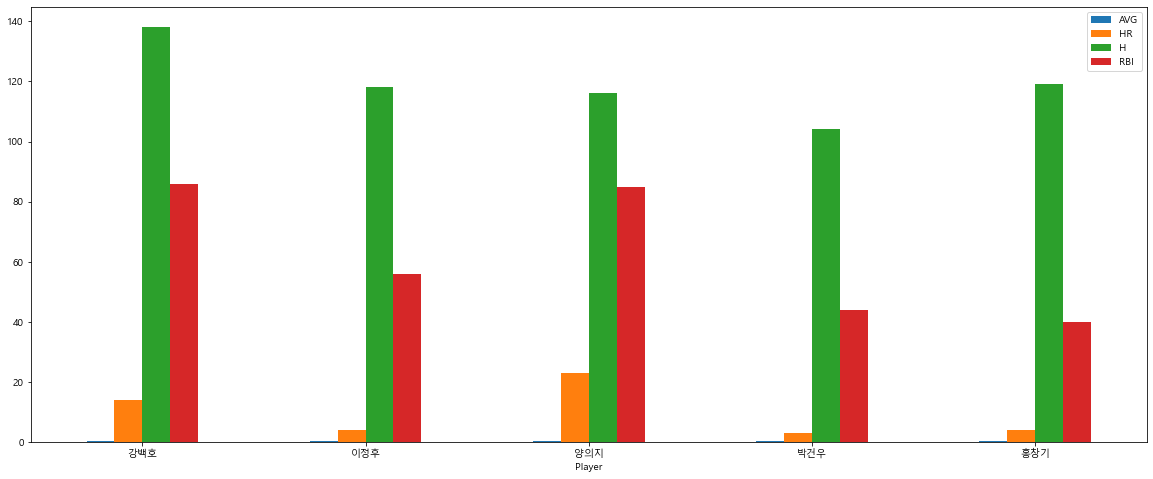

In [287]:
kbo_frm.head(5).plot(kind='bar',figsize=(20,8),rot=0)